# **TIME SERIES FORECASTING (TRAIN, TEST AND DEPLOY)**

## Load the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

train = pd.read_csv("sales_supervised_train.csv")
train = train.set_index("fecha_venta").sort_index()
train.head()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-3 week),var1(t-2 week),var1(t-1 week),var1(t),esfestivo,lluvia,tavg_w,tmax_w,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,,,
2021-05-22,216.0,324.0,177.0,216.0,162.0,177.0,189.0,402.0,276.0,216.0,306.0,0,0,23.6,32.5,22,6,5,2021,0
2021-05-23,324.0,177.0,216.0,162.0,177.0,189.0,306.0,369.0,345.0,324.0,453.0,0,1,18.5,21.6,23,7,5,2021,0
2021-05-24,177.0,216.0,162.0,177.0,189.0,306.0,453.0,228.0,174.0,177.0,141.0,0,0,20.1,27.2,24,1,5,2021,1
2021-05-25,216.0,162.0,177.0,189.0,306.0,453.0,141.0,237.0,174.0,216.0,210.0,0,0,19.3,25.0,25,2,5,2021,1
2021-05-26,162.0,177.0,189.0,306.0,453.0,141.0,210.0,288.0,180.0,162.0,243.0,0,0,19.8,23.0,26,3,5,2021,1


In [2]:
test = pd.read_csv("sales_supervised_test.csv")
test = test.set_index("fecha_venta").sort_index()
test.head()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-3 week),var1(t-2 week),var1(t-1 week),var1(t),esfestivo,lluvia,tavg_w,tmax_w,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,,,
2023-04-07,216.0,210.0,315.0,210.0,204.0,231.0,327.0,255.0,150.0,216.0,330.0,1,0,13.9,19.8,7,5,4,2023,1
2023-04-08,210.0,315.0,210.0,204.0,231.0,327.0,330.0,177.0,309.0,210.0,267.0,1,0,14.1,21.5,8,6,4,2023,0
2023-04-09,315.0,210.0,204.0,231.0,327.0,330.0,267.0,327.0,321.0,315.0,315.0,1,0,14.9,20.6,9,7,4,2023,0
2023-04-10,210.0,204.0,231.0,327.0,330.0,267.0,315.0,153.0,183.0,210.0,213.0,0,0,22.8,33.7,10,1,4,2023,1
2023-04-11,204.0,231.0,327.0,330.0,267.0,315.0,213.0,216.0,156.0,204.0,153.0,0,0,17.8,22.6,11,2,4,2023,1


## Split data into train and test sets

I will use the train set to train the model and the test set to evaluate it

- Select the feature columns and the label columns
- Split the data into train and validation sets using a 90/10 ratio.

In [3]:
train.columns

Index(['var1(t-7 day)', 'var1(t-6 day)', 'var1(t-5 day)', 'var1(t-4 day)',
       'var1(t-3 day)', 'var1(t-2 day)', 'var1(t-1 day)', 'var1(t-3 week)',
       'var1(t-2 week)', 'var1(t-1 week)', 'var1(t)', 'esfestivo', 'lluvia',
       'tavg_w', 'tmax_w', 'day', 'dayofweek', 'month', 'year', 'weekday'],
      dtype='object')

In [4]:
# set the product id and family (only for logging purposes, do not use it for filtering)

label_column = 'var1(t)' #amount
features_column = [
    'var1(t-7 day)',
    'var1(t-6 day)',
    'var1(t-5 day)',
    'var1(t-4 day)',
    'var1(t-3 day)',
    'var1(t-2 day)',
    'var1(t-1 day)',
    'var1(t-3 week)',
    'var1(t-2 week)',
    'var1(t-1 week)',
    'esfestivo',
    'lluvia',
    'tavg_w',
    'tmax_w',
    'day',
    'dayofweek',
    'month',
    'year',
    'weekday'
]

label = train[label_column] #y
features = train[features_column] #X

VAL_SPLIT = 0.1

train_size = int(len(train) * (1- VAL_SPLIT))

X_train = features[:train_size] #90%
y_train = label[:train_size] #90%
X_val = features[train_size:] #10% test
y_val = label[train_size:] #10% test

In [5]:
print(len(X_train))
print(len(y_train))
print()
print(len(X_val))
print(len(y_val))

600
600

67
67


## Start MLFlow Server

- Launch a local MLFlow server
- Connect to local MLFlow server
- Set the desired experiment
- Enable MLFlow autologing for sklearn

In [8]:
import mlflow

MLFLOW_TRACKING_URI = "http://localhost:5000"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [9]:
NAME = "DATATHON"
experiment = mlflow.set_experiment(NAME)
# experiment = mlflow.get_experiment_by_name(NAME)

# Set the autolog sklearn
mlflow.sklearn.autolog()

When mlflow.sklearn.autolog() is called, MLflow automatically begins to track certain information about the Scikit-learn model being trained. This includes input parameters, performance metrics and other metadata relevant to the model.

In practical terms, this means that you do not need to manually record every model parameter or performance metric you want to monitor. The autolog() function takes care of this automatically, which greatly simplifies the process of model tracking and logging.

## Train and evaluate the model

In next section I will use a pipeline to preprocess the data and train the model.

- Create a Sklearn Pipeline
- Start a run in MLFlow
- Train the model using the train dataset
- Add convenient tags for PRODUCT_ID and FAMILY_ID
- Evaluate the model
- Autolog will automatically log metrics and model

### GradientBoostingRegressor

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Defining the pipeline
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingRegressor())
])

# Define the hyperparameters to search for
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.1, 0.3, 0.5],
    # 'model__subsample': [1.0, 2.0, 3.0],
    # 'model__min_samples_split': [2, 4, 6],
    # 'model__min_samples_leaf': [1, 3, 5],
    # 'model__min_weight_fraction_leaf': [0.0, 0.5, 0.8],
    # 'model__min_impurity_decrease': [0.0, 0.3, 0.7],
    # 'model__alpha': [0.9, 1.3, 1.5],
    # 'model__validation_fraction': [0.1, 0.4, 0.8]
}

# Hyperparameter search using GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='neg_mean_squared_error') #cv = cross-validation (3 folds)
grid_search.fit(X_train, y_train)
print('Best_params', grid_search.best_params_)

best_params = grid_search.best_params_

PRODUCT_ID = 3960
PRODUCT_FAMILY = "BOLLERIA"

with mlflow.start_run() as run:

    pipe.set_params(**best_params) # unpacking a dictionary
    pipe.fit(X_train, y_train)

    mlflow.set_tag("PRODUCT_ID", PRODUCT_ID)
    mlflow.set_tag("PRODUCT_FAMILY", PRODUCT_FAMILY)

    predictions = pipe.predict(X_val)

    mae = metrics.mean_absolute_error(y_val, predictions)
    mse = metrics.mean_squared_error(y_val, predictions)
    r2 = metrics.r2_score(y_val, predictions)

    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)

2024/03/30 14:51:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '07a35295d9044a9abe70fff1109515ef', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/30 14:52:00 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


Best_params {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}
Best_params {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 50}


- MinMaxScaler maintains the shape of the original data distribution.
- In addition, it is useful when it is required to keep the interpretability of the features on the same scale.

In [11]:
print('MAE', mae)
print('MSE', mse)
print('R2', r2)

MAE 38.76706429697036
MSE 2049.736189757208
R2 0.42213398694679083


### RandomForestRegressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

pipe2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor())
])


param_grid2 = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [0, 3, 5],
    'model__min_samples_split': [2, 4, 6],
}


grid_search2 = GridSearchCV(pipe2, param_grid2, cv=3, scoring='neg_mean_squared_error') #cv = cross-validation (3 folds)
grid_search2.fit(X_train, y_train)

best_params2 = grid_search2.best_params_
print('Best_params', grid_search2.best_params_)

PRODUCT_ID = 3960
PRODUCT_FAMILY = "BOLLERIA"

with mlflow.start_run() as run2:

    pipe2.set_params(**best_params2)
    pipe2.fit(X_train, y_train)

    mlflow.set_tag("PRODUCT_ID", PRODUCT_ID)
    mlflow.set_tag("PRODUCT_FAMILY", PRODUCT_FAMILY)

    predictions2 = pipe2.predict(X_val)

    mae = metrics.mean_absolute_error(y_val, predictions2)
    mse = metrics.mean_squared_error(y_val, predictions2)
    r2 = metrics.r2_score(y_val, predictions2)

    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)

2024/03/30 14:53:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd6b8b2bc429d4032b201a998be59f6ec', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/03/30 14:53:33 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


Best_params {'model__max_depth': 5, 'model__min_samples_split': 4, 'model__n_estimators': 50}


In [13]:
print('MAE', mae)
print('MSE', mse)
print('R2', r2)

MAE 37.63070470494443
MSE 1838.691081756662
R2 0.4816322754309813


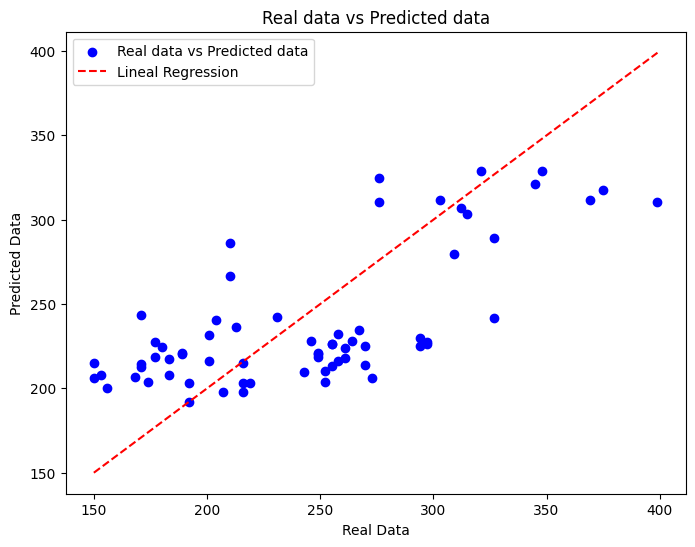

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val, predictions2, color='blue', label='Real data vs Predicted data')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Lineal Regression')
plt.title('Real data vs Predicted data')
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.show()

**If the points (predicted data) are very close to the regression line, it indicates a good prediction, while if they are scattered away from the line, it indicates a less accurate prediction.**

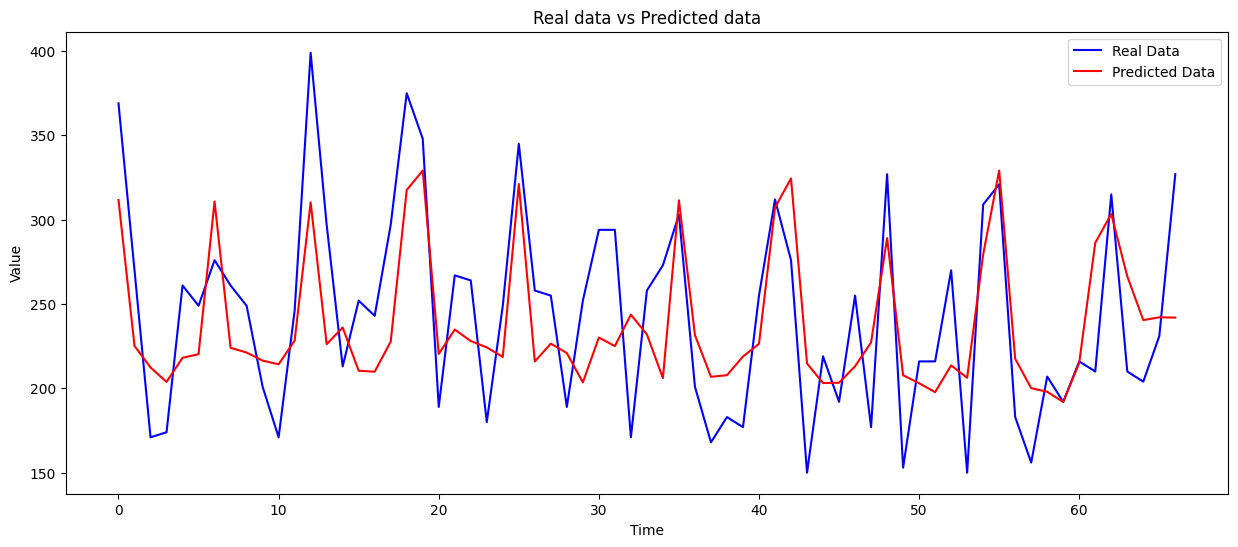

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

indices_tiempo = range(len(y_val))

plt.plot(indices_tiempo, y_val, color='blue', label='Real Data')

plt.plot(indices_tiempo, predictions2, color='red', label='Predicted Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real data vs Predicted data')
plt.legend()

plt.show()

### DecisionTreeRegressor

In [16]:
from sklearn.tree import DecisionTreeRegressor

pipe3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', DecisionTreeRegressor())
])


param_grid3 = {
    'model__min_samples_leaf': [1, 3, 5],
    'model__max_depth': [0, 1, 2],
    'model__min_samples_split': [2, 4, 6],
}


grid_search3 = GridSearchCV(pipe3, param_grid3, cv=3, scoring='neg_mean_squared_error') #cv = cross-validation (3 folds)
grid_search3.fit(X_train, y_train)

best_params3 = grid_search3.best_params_
print('Best_params', grid_search3.best_params_)

PRODUCT_ID = 3960
PRODUCT_FAMILY = "BOLLERIA"

with mlflow.start_run() as run3:

    pipe3.set_params(**best_params3)
    pipe3.fit(X_train, y_train)

    mlflow.set_tag("PRODUCT_ID", PRODUCT_ID)
    mlflow.set_tag("PRODUCT_FAMILY", PRODUCT_FAMILY)

    predictions3 = pipe3.predict(X_val)

    mae = metrics.mean_absolute_error(y_val, predictions3)
    mse = metrics.mean_squared_error(y_val, predictions3)
    r2 = metrics.r2_score(y_val, predictions3)

    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)

2024/03/30 14:54:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8c4222a105914125b7e9de786ec6ad15', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/03/30 14:54:18 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


Best_params {'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}


In [17]:
print('MAE', mae)
print('MSE', mse)
print('R2', r2)

MAE 39.5265433607823
MSE 2107.516476334322
R2 0.40584444490511795


### AdaBoostRegressor

In [18]:
from sklearn.ensemble import AdaBoostRegressor

pipe4 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', AdaBoostRegressor())
])


param_grid4 = {
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [1.0, 1.4, 1.8],
}


grid_search4 = GridSearchCV(pipe4, param_grid4, cv=3, scoring='neg_mean_squared_error') #cv = cross-validation (3 folds)
grid_search4.fit(X_train, y_train)

best_params4 = grid_search4.best_params_
print('Best_params', grid_search4.best_params_)

PRODUCT_ID = 3960
PRODUCT_FAMILY = "BOLLERIA"

with mlflow.start_run() as run4:

    pipe4.set_params(**best_params4)
    pipe4.fit(X_train, y_train)

    mlflow.set_tag("PRODUCT_ID", PRODUCT_ID)
    mlflow.set_tag("PRODUCT_FAMILY", PRODUCT_FAMILY)

    predictions4 = pipe4.predict(X_val)

    mae = metrics.mean_absolute_error(y_val, predictions4)
    mse = metrics.mean_squared_error(y_val, predictions4)
    r2 = metrics.r2_score(y_val, predictions4)

    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)

2024/03/30 14:54:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4cf674698b444afb95cd438b791e294c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/03/30 14:55:00 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.


Best_params {'model__learning_rate': 1.8, 'model__n_estimators': 100}


In [20]:
print('MAE', mae)
print('MSE', mse)
print('R2', r2)

MAE 36.688433843591696
MSE 1945.5636490834409
R2 0.4515025325428482


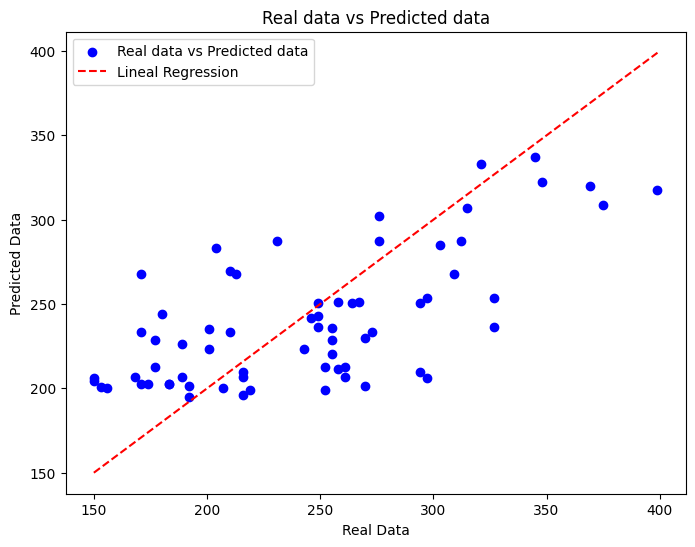

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val, predictions4, color='blue', label='Real data vs Predicted data')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Lineal Regression')
plt.title('Real data vs Predicted data')
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.show()

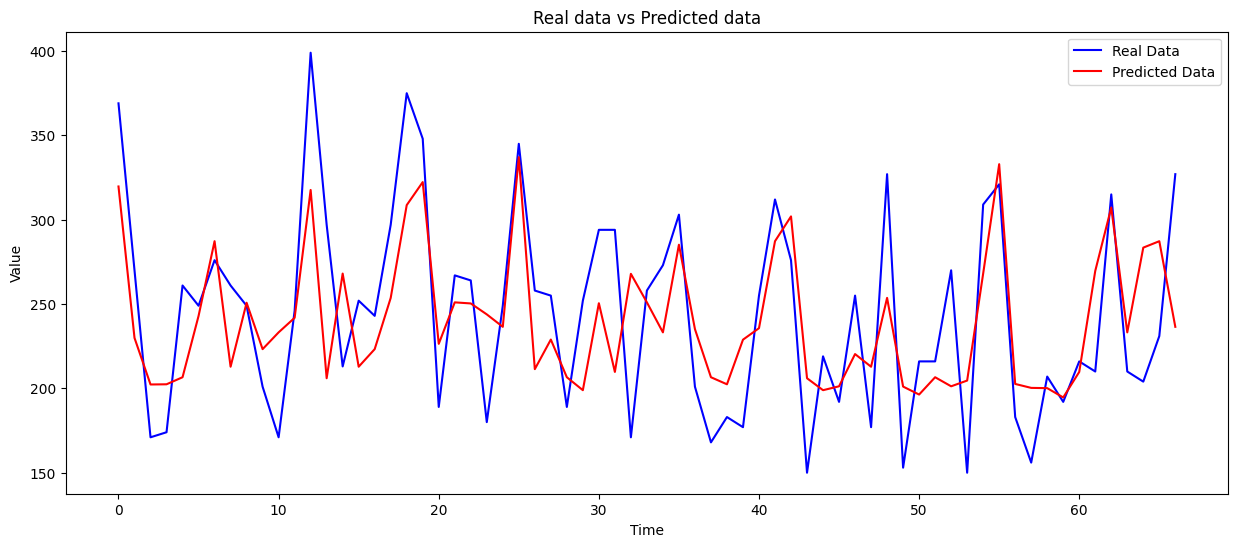

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

indices_tiempo = range(len(y_val))

plt.plot(indices_tiempo, y_val, color='blue', label='Real Data')

plt.plot(indices_tiempo, predictions4, color='red', label='Predicted Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real data vs Predicted data')
plt.legend()

plt.show()

- At first glance, assemblers give better results.
- The best model is AdaBoostRegressor.

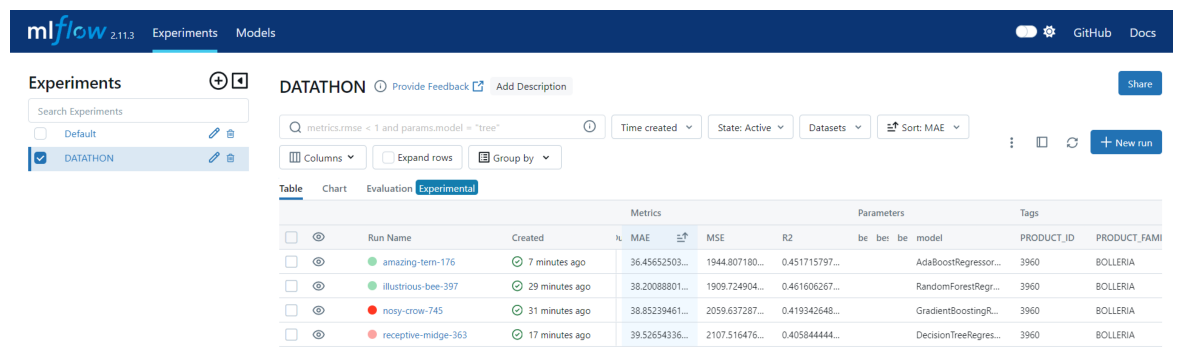

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'MLflow 1.png'

image = mpimg.imread(image_path)

plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

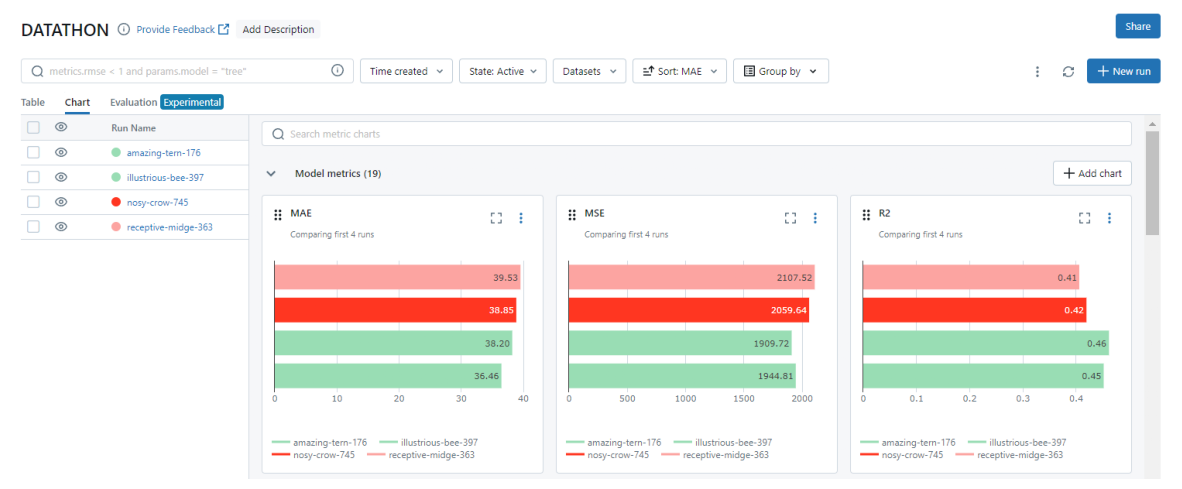

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'MLflow 2.png'

image = mpimg.imread(image_path)

plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Register the model

In [25]:
run_id = run4.info.run_id
run_id

'f8b72d0c8dce479ba97843487a51adaa'

In [26]:
model_path = f"runs:/{run_id}/model"

In [27]:
Model_Name = 'AdaBoost'

In [28]:
result = mlflow.register_model(model_path, Model_Name)
print(f" Registered model version: {result.version}!")

Successfully registered model 'AdaBoost'.
2024/03/30 14:57:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: AdaBoost, version 1


 Registered model version: 1!


Created version '1' of model 'AdaBoost'.


## Tag the Model

- Assign a tag to the model to indicate that it is ready for production.
- Deploy the model by selecting the (same) tag instead of a specific (different) version.

I can use the MLflow UI or code snipets.

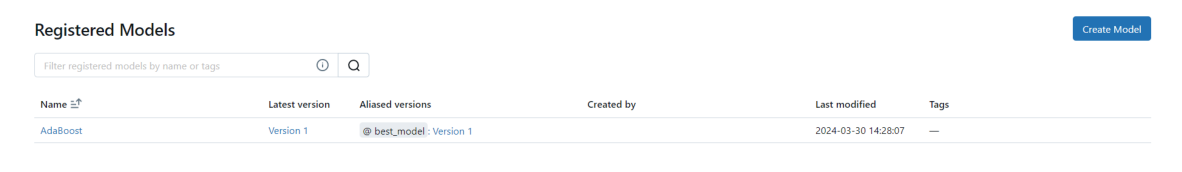

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'MLflow 3.png'

image = mpimg.imread(image_path)

plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Deploy the model

- Use of MLflow directly on the host system

```bash
export MLFLOW_TRACKING_URI=http://localhost:5000
mlflow models serve -m models:/<model_name>@production -p 5001 --env-manager local
```

- Using Docker to contain MLflow

```bash
docker run --net host --env MLFLOW_TRACKING_URI=http://localhost:5000 ghcr.io/mlflow/mlflow:v2.10.2 mlflow models serve --model-uri models:/<model_name>/<version> --port 5001 --env-manager local
```

## Make requests to the model

The model is now deployed and ready to receive requests. I will make a request to the model using the test set.

- Prepare the test set to be sent as JSON
- Make a POST request to the model
- Get the predictions from the response and show them

In [30]:
test.head()

,var1(t-7 day),var1(t-6 day),var1(t-5 day),var1(t-4 day),var1(t-3 day),var1(t-2 day),var1(t-1 day),var1(t-3 week),var1(t-2 week),var1(t-1 week),var1(t),esfestivo,lluvia,tavg_w,tmax_w,day,dayofweek,month,year,weekday
fecha_venta,,,,,,,,,,,,,,,,,,,,
2023-04-07,216.0,210.0,315.0,210.0,204.0,231.0,327.0,255.0,150.0,216.0,330.0,1,0,13.9,19.8,7,5,4,2023,1
2023-04-08,210.0,315.0,210.0,204.0,231.0,327.0,330.0,177.0,309.0,210.0,267.0,1,0,14.1,21.5,8,6,4,2023,0
2023-04-09,315.0,210.0,204.0,231.0,327.0,330.0,267.0,327.0,321.0,315.0,315.0,1,0,14.9,20.6,9,7,4,2023,0
2023-04-10,210.0,204.0,231.0,327.0,330.0,267.0,315.0,153.0,183.0,210.0,213.0,0,0,22.8,33.7,10,1,4,2023,1
2023-04-11,204.0,231.0,327.0,330.0,267.0,315.0,213.0,216.0,156.0,204.0,153.0,0,0,17.8,22.6,11,2,4,2023,1


In [31]:
import requests
import json

URL = 'http://localhost:5001/invocations'
headers = {"content-type": "application/json"}

data = {
    "dataframe_split": {
        "columns": test.columns.tolist(),
        "index": test.index.tolist(),
        "data": test.values.tolist()
    }
}

response = requests.post(URL, headers=headers, data=json.dumps(data))
predictions = response.json()['predictions'] # having scaled the data in a pipeline, the data will be returned unscaled
test.index, predictions

(Index(['2023-04-07', '2023-04-08', '2023-04-09', '2023-04-10', '2023-04-11',
        '2023-04-12', '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
        '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21',
        '2023-04-22', '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
        '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30'],
       dtype='object', name='fecha_venta'),
 [270.03614457831327,
  334.9852941176471,
  347.126582278481,
  206.01347708894878,
  229.91394658753708,
  235.69565217391303,
  200.1283292978208,
  212.83695652173913,
  268.0634328358209,
  330.7674418604651,
  192.5096153846154,
  201.23529411764707,
  201.06730769230768,
  195.53164556962025,
  247.08333333333334,
  269.63513513513516,
  354.72222222222223,
  196.78301886792454,
  201.06730769230768,
  202.1196581196581,
  206.01347708894878,
  245.90625,
  251.5,
  356.05263157894734])

## Push Results to Database

I push the results to the database so I can visualize them using other tools like PowerBI

In [44]:
# Helpfull class used to connect to the database and push dataframes

import sqlalchemy as sa


class DatabaseConnection:

    def __init__(
        self,
        username: str,
        password: str,
        dialect: str = "mysql",
        driver: str = "pymysql",
        host: str = " *** ",
        port: int = 3306,
        database: str = "sandbox",
    ) -> None:
        
        connection_string = f"{dialect}+{driver}://{username}:{password}@{host}:{port}/{database}"
        self.engine = sa.create_engine(connection_string)

    def insert_dataframe(self, df: pd.DataFrame, table_name: str) -> None:
        """Inserts a dataframe into a table
        
        Args:
            df (pd.DataFrame): dataframe to insert
            table_name (str): table name
        """
        df.to_sql(table_name, self.engine, if_exists="replace", index=False)

    def query_to_df(self, query: str) -> pd.DataFrame:
        """Retrieves a dataframe from a query.

        Args:
            query (str): query to perform.

        Returns:
            pd.DataFrame: daframe with the results of the query.
        """
        with self.engine.connect() as conn:
            df = pd.read_sql_query(query, conn)
            return df

    def check_connection(self) -> bool:
        """Checks if the connection is working

        Returns:
            bool: True if the connection is working, False otherwise
        """
        try:
            self.engine.connect()
        except Exception as e:
            print(e)
            return False

Prepare the dataframe to upload to the database

In [32]:
test.index.tolist()

['2023-04-07',
 '2023-04-08',
 '2023-04-09',
 '2023-04-10',
 '2023-04-11',
 '2023-04-12',
 '2023-04-13',
 '2023-04-14',
 '2023-04-15',
 '2023-04-16',
 '2023-04-17',
 '2023-04-18',
 '2023-04-19',
 '2023-04-20',
 '2023-04-21',
 '2023-04-22',
 '2023-04-23',
 '2023-04-24',
 '2023-04-25',
 '2023-04-26',
 '2023-04-27',
 '2023-04-28',
 '2023-04-29',
 '2023-04-30']

In [33]:
[PRODUCT_ID] * len(predictions)

[3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960,
 3960]

In [34]:
dates = test.index.tolist()

# Create a dataframe with the data to store
df_article_prediction = pd.DataFrame({
    "fecha": dates,
    "cantidad": predictions,
    "articulo": [PRODUCT_ID] * len(predictions),  # repeat the article for each date
    "familia": [PRODUCT_FAMILY] * len(predictions),  # repeat the family for each date
})

df_article_prediction

,fecha,cantidad,articulo,familia
0,2023-04-07,270.036145,3960,BOLLERIA
1,2023-04-08,334.985294,3960,BOLLERIA
2,2023-04-09,347.126582,3960,BOLLERIA
3,2023-04-10,206.013477,3960,BOLLERIA
4,2023-04-11,229.913947,3960,BOLLERIA
5,2023-04-12,235.695652,3960,BOLLERIA
6,2023-04-13,200.128329,3960,BOLLERIA
7,2023-04-14,212.836957,3960,BOLLERIA
8,2023-04-15,268.063433,3960,BOLLERIA
9,2023-04-16,330.767442,3960,BOLLERIA


Push the dataframe to the database

In [ ]:
# Database credentials
USER = ' *** '
PASSWORD = ' *** '
NAME = "Guillermo"
table_name = f"Materials_Prediction_Group_{NAME}"

# Connect to the database
db = DatabaseConnection(USER, PASSWORD)
db.insert_dataframe(df_article_prediction, table_name)

--------------